In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
titanic_dataset = pd.read_csv('titanic.csv')

In [3]:
titanic_dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
## Cleaning continuous variables

In [6]:
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(), inplace=True)

In [7]:
titanic_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [8]:
## SibSp and Parch stands for Sibling spouse and parent child respectively. So, we can merge it into into feature.

<Figure size 640x480 with 0 Axes>

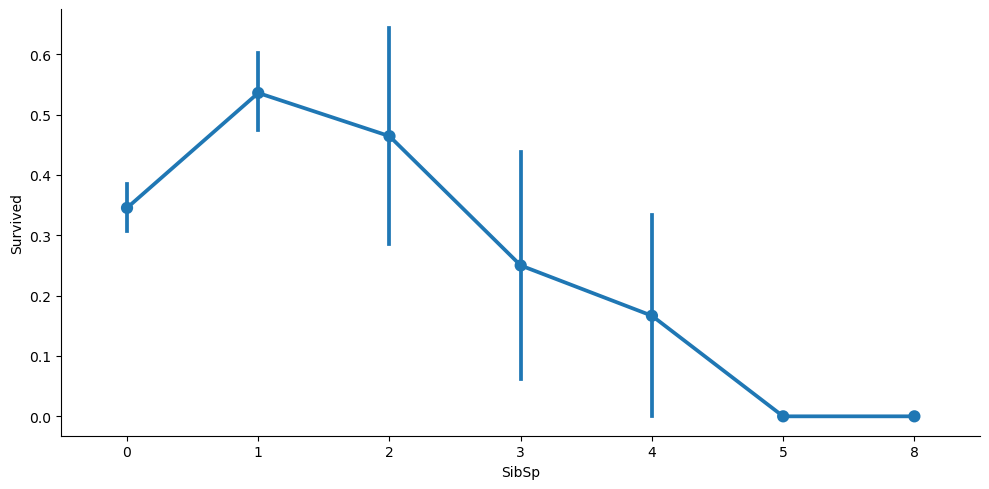

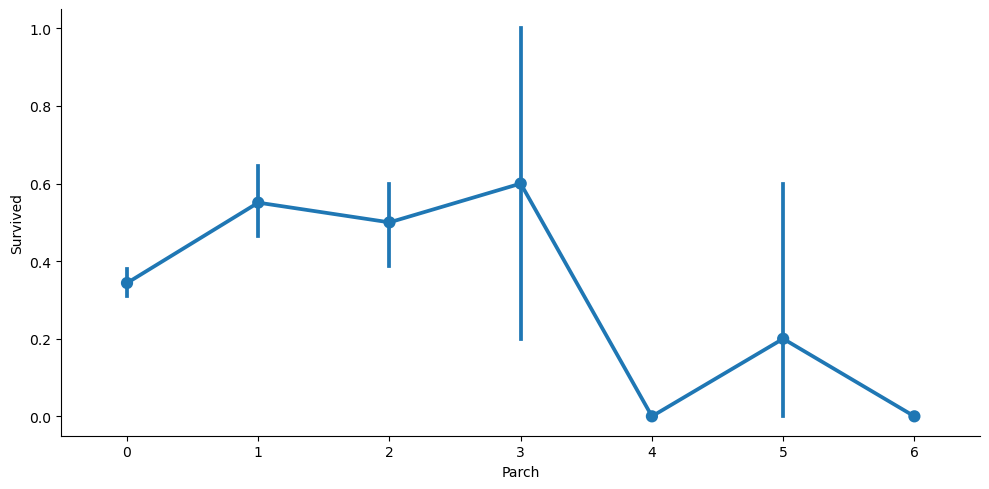

In [9]:
for index, col in enumerate(['SibSp', 'Parch']):
    plt.figure(index)
    sns.catplot(x=col, y='Survived', data=titanic_dataset, kind='point', aspect=2)

In [10]:
titanic_dataset['Family_Count'] = titanic_dataset['SibSp'] + titanic_dataset['Parch']

In [11]:
titanic_dataset.drop(['PassengerId', 'SibSp', 'Parch'], axis=1,inplace=True)

In [12]:
titanic_dataset.head(5)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_Count
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [13]:
titanic_dataset.isnull().sum()

Survived          0
Pclass            0
Name              0
Sex               0
Age               0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Family_Count      0
dtype: int64

In [14]:
titanic_dataset.groupby(titanic_dataset['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [15]:
titanic_dataset['CabinIndicator']  = np.where(titanic_dataset['Cabin'].isnull(),  0, 1)

In [16]:
titanic_dataset.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_Count,CabinIndicator
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [17]:
# Converting Sex into numeric

In [18]:
gender = {'male': 1, 'female': 0}
titanic_dataset['Sex'] = titanic_dataset['Sex'].map(gender)

In [19]:
titanic_dataset

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_Count,CabinIndicator
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",1,35.000000,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.000000,211536,13.0000,NaN,S,0,0
887,1,1,"Graham, Miss. Margaret Edith",0,19.000000,112053,30.0000,B42,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,W./C. 6607,23.4500,NaN,S,3,0
889,1,1,"Behr, Mr. Karl Howell",1,26.000000,111369,30.0000,C148,C,0,1


In [20]:
titanic_dataset.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1,inplace=True)

In [21]:
titanic_dataset.head()

,Survived,Pclass,Sex,Age,Fare,Family_Count,CabinIndicator
0,0,3,1,22.0,7.2500,1,0
1,1,1,0,38.0,71.2833,1,1
2,1,3,0,26.0,7.9250,0,0
3,1,1,0,35.0,53.1000,1,1
4,0,3,1,35.0,8.0500,0,0


In [22]:
titanic_dataset.to_csv('cleaned_titanic.csv', index=False)